In [30]:
import ROOT
import math
from ROOT import gRandom, TF1, TH1F, TStopwatch
import numpy as np


In [31]:
def f(xx, pp):
    x = xx[0]
    norm = pp[0]
    return norm * (1 / math.sqrt(1.01 - x) + 1 / math.sqrt(1.01 + x))

In [32]:
a, b = -1., 1.
M = f([1], [1])
# delta = 0.5
ksi = gRandom.Uniform(1.,0.)
etha = gRandom.Uniform(1.,0.)
r = (b - a) * ksi + a
mu = M * etha

In [33]:
def Neyman(a=a, b=b, ksi=ksi, etha=etha, mu=mu, r=r):
    while mu > f([r], [1]):
        ksi = gRandom.Uniform(1.,0.)
        etha = gRandom.Uniform(1.,0.)
        r = (b - a) * ksi + a
        mu = M * etha
    return r    #, ksi, etha, mu

In [34]:
print(Neyman(a, b))

0.4247038741596043


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


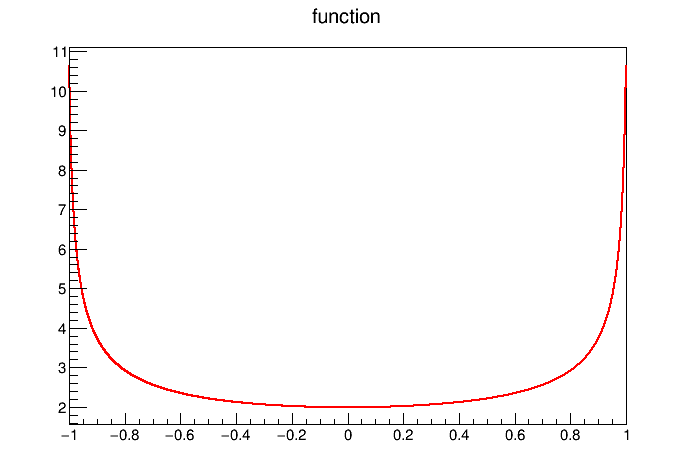

In [35]:
c = ROOT.TCanvas("c", "result")
f1 = ROOT.TF1("function", f, a, b, 1)
f1.SetParameters(1, 1)
f1.SetNpx(10000)
f1.Draw()
c.Draw()

Real time 0:00:08, CP time 1.610
 FCN=51.5074 FROM MIGRAD    STATUS=CONVERGED      14 CALLS          15 TOTAL
                     EDM=2.8315e-15    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           7.60467e+01   7.62433e-01   2.69762e-03   9.87011e-08


Warning in <TROOT::Append>: Replacing existing TH1: h1 (Potential memory leak).


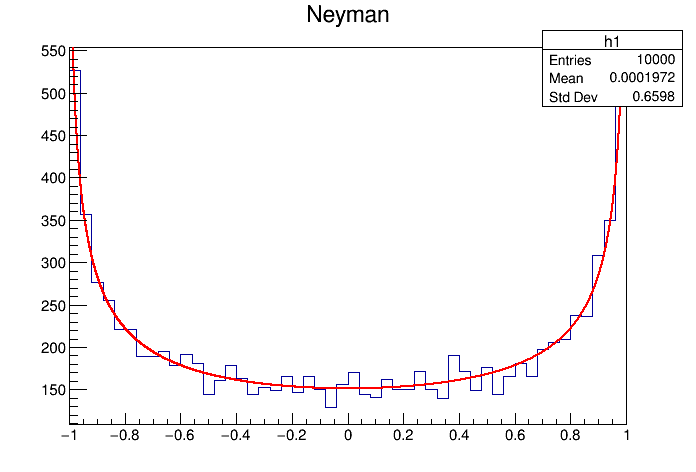

In [36]:
h1 = TH1F("h1","Neyman",50,-1,1)
sw = TStopwatch()
sw.Start()
for i in range(0, 10000):
    r = Neyman(a, b)
    h1.Fill(r)
sw.Stop()
sw.Print()
h1.Fit(f1)
# h1.Draw()
c.Draw()

In [37]:
print("Mean: ", h1.GetMean())
print("Standard deviation: ", h1.GetStdDev())

Mean:  0.00019718614160083234
Standard deviation:  0.6597872394998563


In [38]:
def F(xx, pp):
    x = xx[0]
    p = pp[0]
    return  2 * math.sqrt(1.01 + x) - 2 * math.sqrt(1.01 - x)

In [39]:
a, b = -1., 1.

In [40]:
Fa = F([a], [1])
Fb = F([b], [1])
# koef = 2/5 * (math.sqrt(201)-1)
print(Fb, koef)
koef_c = 0.01

2.6354893757515647 5.27097875150313


In [41]:
def F_norm(x):
    return (F([x], [1]) - F([a], [1])) / (F([b], [1]) - F([a], [1]))

In [42]:
# def F_inv(xx, pp=None):
#     x = xx[0]
#     p = pp[0]
#     return np.sign(x-0.5) * math.sqrt(0.2525 * (koef* (x-0.5)) ** 2 - 0.015625 * (koef*(x-0.5)) ** 4)
F_inv=None

In [43]:
Fb_half = Fb / 2
def Z(y):
    return (2*y-1)*Fb_half

k = 1+koef_c
k_doubled = k * 2
k_squared = k **2

In [44]:
def F_inverted(xx, pp=None):
    y=xx[0]
    p=pp[0]
    if y-0.5 >= 0:
        return math.sqrt(k_squared - (1/4)*(k_doubled - Z(y)**2) ** 2)
    return -math.sqrt(k_squared - (1/4)*(k_doubled - Z(y)**2) ** 2)
#     return np.sign(y-0.5) * math.sqrt(k_squared - (1/4)*(k_doubled - Z(y)**2) ** 2)

In [45]:
print(F_norm(a), F_norm(b))

0.0 1.0


In [46]:
print(F_norm(a), F_norm(b))
print(F_inverted([0], [1]), F_inverted([1], [1]))

0.0 1.0
-0.9999999999999999 0.9999999999999999


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


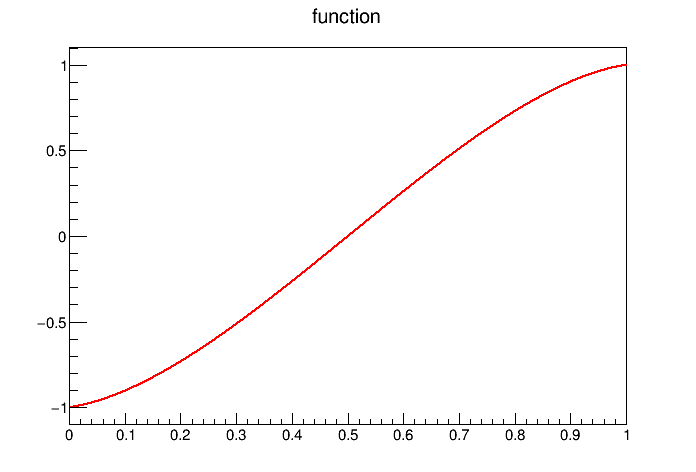

In [47]:
c = ROOT.TCanvas("c", "result")
f2 = ROOT.TF1("function", F_inverted, 0., 1., 1)
f2.SetParameters(1, 1)
f2.SetNpx(10000)
f2.Draw()
c.Draw()

In [48]:
def DirectSampling():
    ksi = gRandom.Uniform(0., 1.)
    r = F_inverted([ksi], [1])
    return r

Real time 0:00:00, CP time 0.210
 FCN=33.784 FROM MIGRAD    STATUS=CONVERGED      12 CALLS          13 TOTAL
                     EDM=2.74712e-20    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           7.61822e+01   7.63112e-01   2.19760e-03  -3.07161e-10


Warning in <TROOT::Append>: Replacing existing TH1: h3 (Potential memory leak).


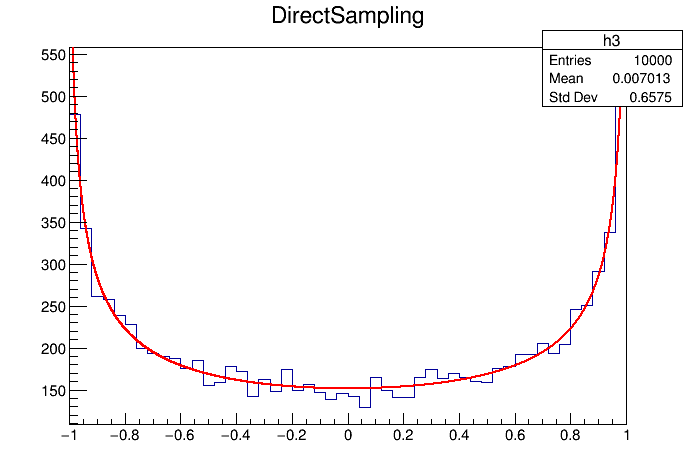

In [49]:
h3 = TH1F("h3","DirectSampling",50,-1,1)
sw = TStopwatch()
sw.Start()
for i in range(0, 10000):
    r = DirectSampling()
    h3.Fill(r)
sw.Stop()
sw.Print()
h3.Fit(f1)
h3.Draw()
c.Draw()

In [50]:
print("Mean: ", h3.GetMean())
print("Standard deviation: ", h3.GetStdDev())

Mean:  0.007012690879055997
Standard deviation:  0.6575309412211336
